In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [ ]:
#Select relevant columns

In [3]:
df = df[['daily','sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [ ]:
#Correlation analysis

<AxesSubplot:xlabel='daily', ylabel='sunday'>

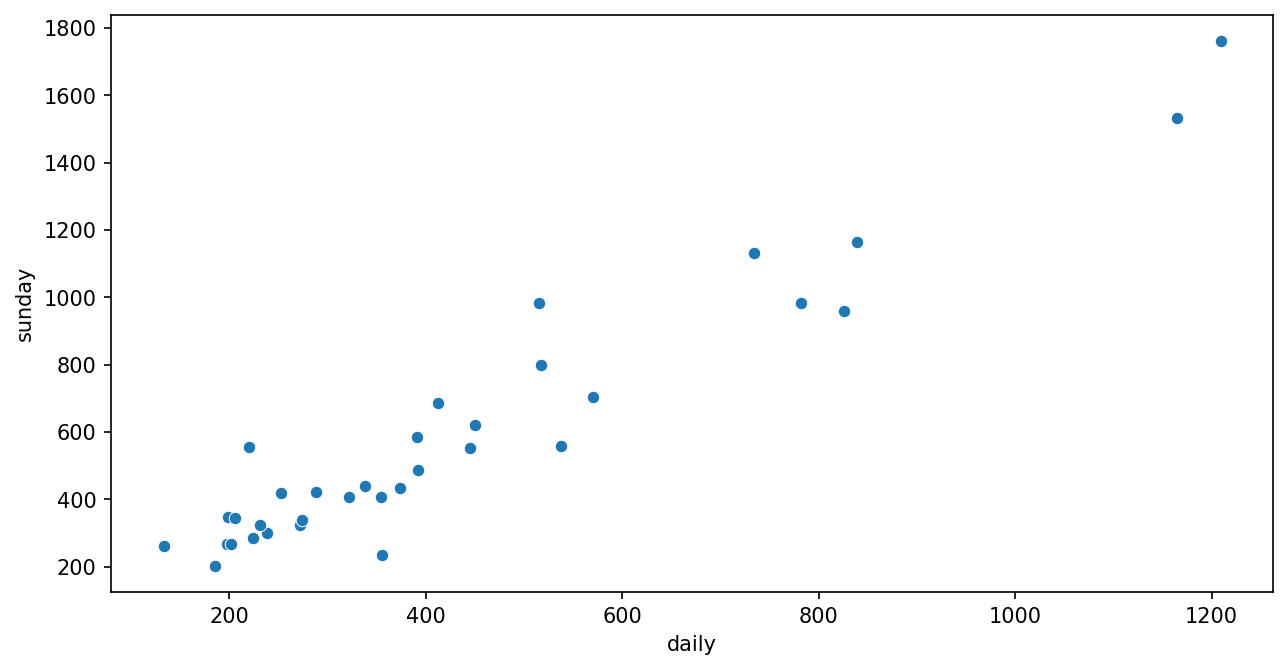

In [4]:
sns.scatterplot(x = df['daily'],y = df['sunday'])

In [5]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

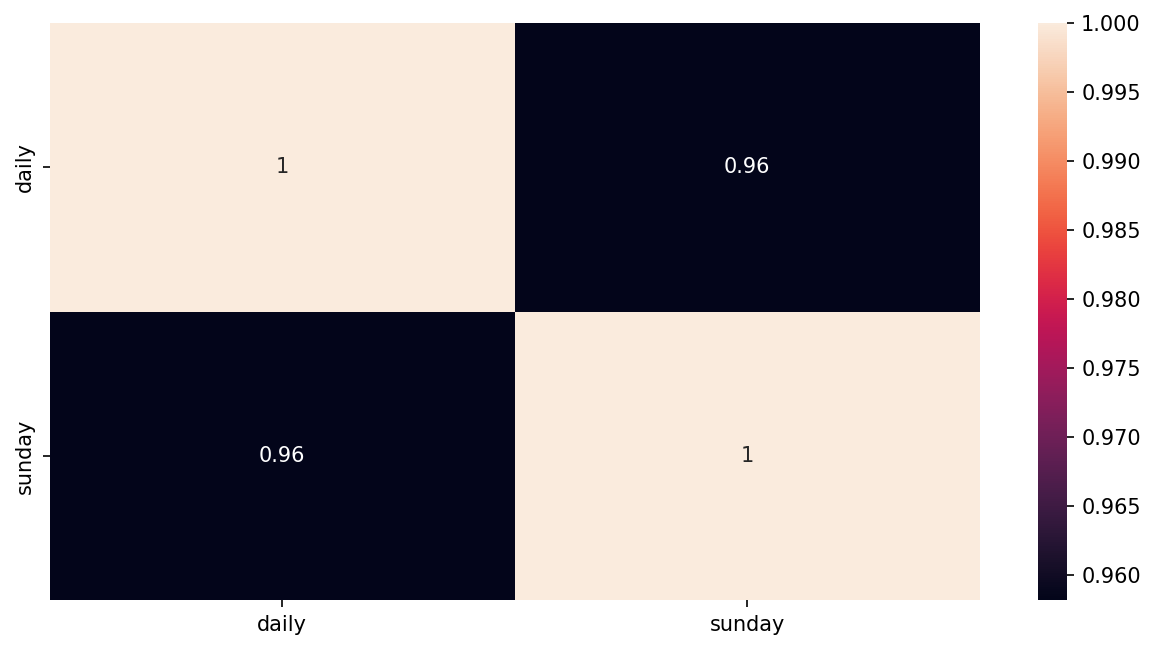

In [6]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Import statsmodels

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols('sunday~daily',data=df).fit()
model

In [9]:
#Model parameters (slope, intercept)
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [10]:
#line equation
daily_sales = 850

sunday_sales = 1.33*daily_sales+13.83
sunday_sales

1144.33

In [11]:
#Print p value
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [12]:
#r2 value
model.rsquared, model.rsquared_adj

(0.9180596895873294, 0.9154990548869335)

# Prediction for new data

In [13]:
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [14]:
test = pd.DataFrame({
    'daily' : [100,152,850,654,759]
})
test

,daily
0,100
1,152
2,850
3,654
4,759


In [15]:
model.predict(test)

0     147.807106
1     217.472273
2    1152.593174
3     890.009081
4    1030.679131
dtype: float64

# In -Class Activity

- We need to predict the adipose tissue(Fat) level based of Waist Circum.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/WC_AT.csv')
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


# Data Transformation
1. Sqrt 
2. Log

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/NewspaperData.csv')
df

In [ ]:
# Distribution of the data
df.head()

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df['daily'])

plt.subplot(1,2,2)
sns.distplot(df['sunday'])

plt.tight_layout()

In [ ]:
df['daily'].skew()

In [ ]:
df['sunday'].skew()

# Log Transformation

In [ ]:
df

In [ ]:
np.log(df['daily'])

In [ ]:
df['log_daily'] = np.log(df['daily'])
df

In [ ]:
df['log_sunday'] = np.log(df['sunday'])
df

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df['log_daily'])

plt.subplot(1,2,2)
sns.distplot(df['log_sunday'])

plt.tight_layout()

In [ ]:
df['log_daily'].skew(), df['log_sunday'].skew()

# Sqrt transformation

In [ ]:
df['sqrt_daily'] = np.sqrt(df['daily'])
df['sqrt_sunday'] = np.sqrt(df['sunday'])
df

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_daily'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_sunday'])

plt.tight_layout()

In [ ]:
df['sqrt_daily'].skew()

In [ ]:
df['sqrt_sunday'].skew()